In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [4]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [5]:
stations_point = gpd.read_file('../data/processed/stations_point.geojson')
stations_area = gpd.read_file('../data/processed/stations_area.geojson')

# Import major crime indicators

















































































































































































































In [6]:
# geojson format is too big -> use csv instead
mci_select = pd.read_csv('../data/processed/mci_select.csv')
# mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
# mci_select = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

C:\Users\willi\AppData\Local\Temp\ipykernel_48032\54038892.py:2: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
mci_select

occurrence_unique_id occurrence_date  occurrence_year occurrence_month  \
0             GO-2015194909      2015-02-02             2015         February   
1             GO-2015216532      2015-02-03             2015         February   
2             GO-2015221290      2015-02-07             2015         February   
3             GO-2015227725      2015-02-08             2015         February   
4             GO-2015230168      2015-02-08             2015         February   
...                     ...             ...              ...              ...   
248568       GO-20191930830      2019-10-07             2019          October   
248569       GO-20191981086      2019-10-14             2019          October   
248570       GO-20192006688      2019-10-17             2019          October   
248571       GO-20192021028      2019-10-19             2019          October   
248572       GO-20192067798      2019-10-26             2019          October   

        occurrence_day  occurrence_dayofyear occurrence_dayofweek       MCI  \
0                    2                    33               Monday   Assault   
1                    3                    34              Tuesday   Assault   
2                    7                    38             Saturday   Assault   
3                    8                    39               Sunday   Assault   
4                    8                    39               Sunday   Assault   
...                ...                   ...                  ...       ...   
248568               7                   280               Monday  Homicide   
248569              14                   287               Monday  Homicide   
248570              17                   290             Thursday  Homicide   
248571              19                   292             Saturday  Homicide   
248572              26                   299             Saturday  Homicide   

       hood_id                      neighbourhood  longitude   latitude  \
0            1             West Humber-Clairville -79.606775  43.733147   
1            1             West Humber-Clairville -79.595459  43.737516   
2            1             West Humber-Clairville -79.622177  43.726176   
3            1             West Humber-Clairville -79.604057  43.731845   
4            1             West Humber-Clairville -79.575803  43.730521   
...        ...                                ...        ...        ...   
248568      60                   Woodbine-Lumsden -79.316228  43.698223   
248569       2  Mount Olive-Silverstone-Jamestown -79.587556  43.736889   
248570      48                  Hillcrest Village -79.358078  43.811142   
248571      87                  High Park-Swansea -79.471015  43.638261   
248572     104                Mount Pleasant West -79.390840  43.699494   

        occurrence_quarter                          geometry  
0                        1  POINT (-79.60677549 43.73314729)  
1                        1  POINT (-79.59545908 43.73751593)  
2                        1  POINT (-79.62217749 43.72617604)  
3                        1  POINT (-79.60405697 43.73184462)  
4                        1  POINT (-79.57580279 43.73052116)  
...                    ...                               ...  
248568                   4   POINT (-79.3162282 43.69822334)  
248569                   4  POINT (-79.58755582 43.73688887)  
248570                   4  POINT (-79.35807772 43.81114186)  
248571                   4  POINT (-79.47101519 43.63826102)  
248572                   4  POINT (-79.39083961 43.69949369)  

[248573 rows x 14 columns]

In [8]:
mci_select.MCI.unique()

array(['Assault', 'Break and Enter', 'Theft Over', 'Robbery',
       'Auto Theft', 'Shootings', 'Homicide'], dtype=object)

In [9]:
mci_select.columns

Index(['occurrence_unique_id', 'occurrence_date', 'occurrence_year',
       'occurrence_month', 'occurrence_day', 'occurrence_dayofyear',
       'occurrence_dayofweek', 'MCI', 'hood_id', 'neighbourhood', 'longitude',
       'latitude', 'occurrence_quarter', 'geometry'],
      dtype='object')

In [10]:
mci_select.replace({'occurrence_month': {'January': 'Jan', 
                                        'February': 'Feb', 
                                        'March': 'Mar', 
                                        'April': 'Apr', 
                                        'May': 'May', 
                                        'June': 'Jun', 
                                        'July': 'Jul', 
                                        'August': 'Aug', 
                                        'September': 'Sep', 
                                        'October': 'Oct', 
                                        'November': 'Nov', 
                                        'December': 'Dec'},
                    'occurrence_dayofweek': {'Monday': "Mon", 
                                            'Tuesday': "Tue", 
                                            'Wednesday': "Wed", 
                                            'Thursday': "Thu", 
                                            'Friday': "Fri", 
                                            'Saturday': "Sat", 
                                            'Sunday': "Sun"}}, inplace=True)

# Distribution by time period

Text(0.5, 0.98, 'Number of crimes by time period in City of Toronto')

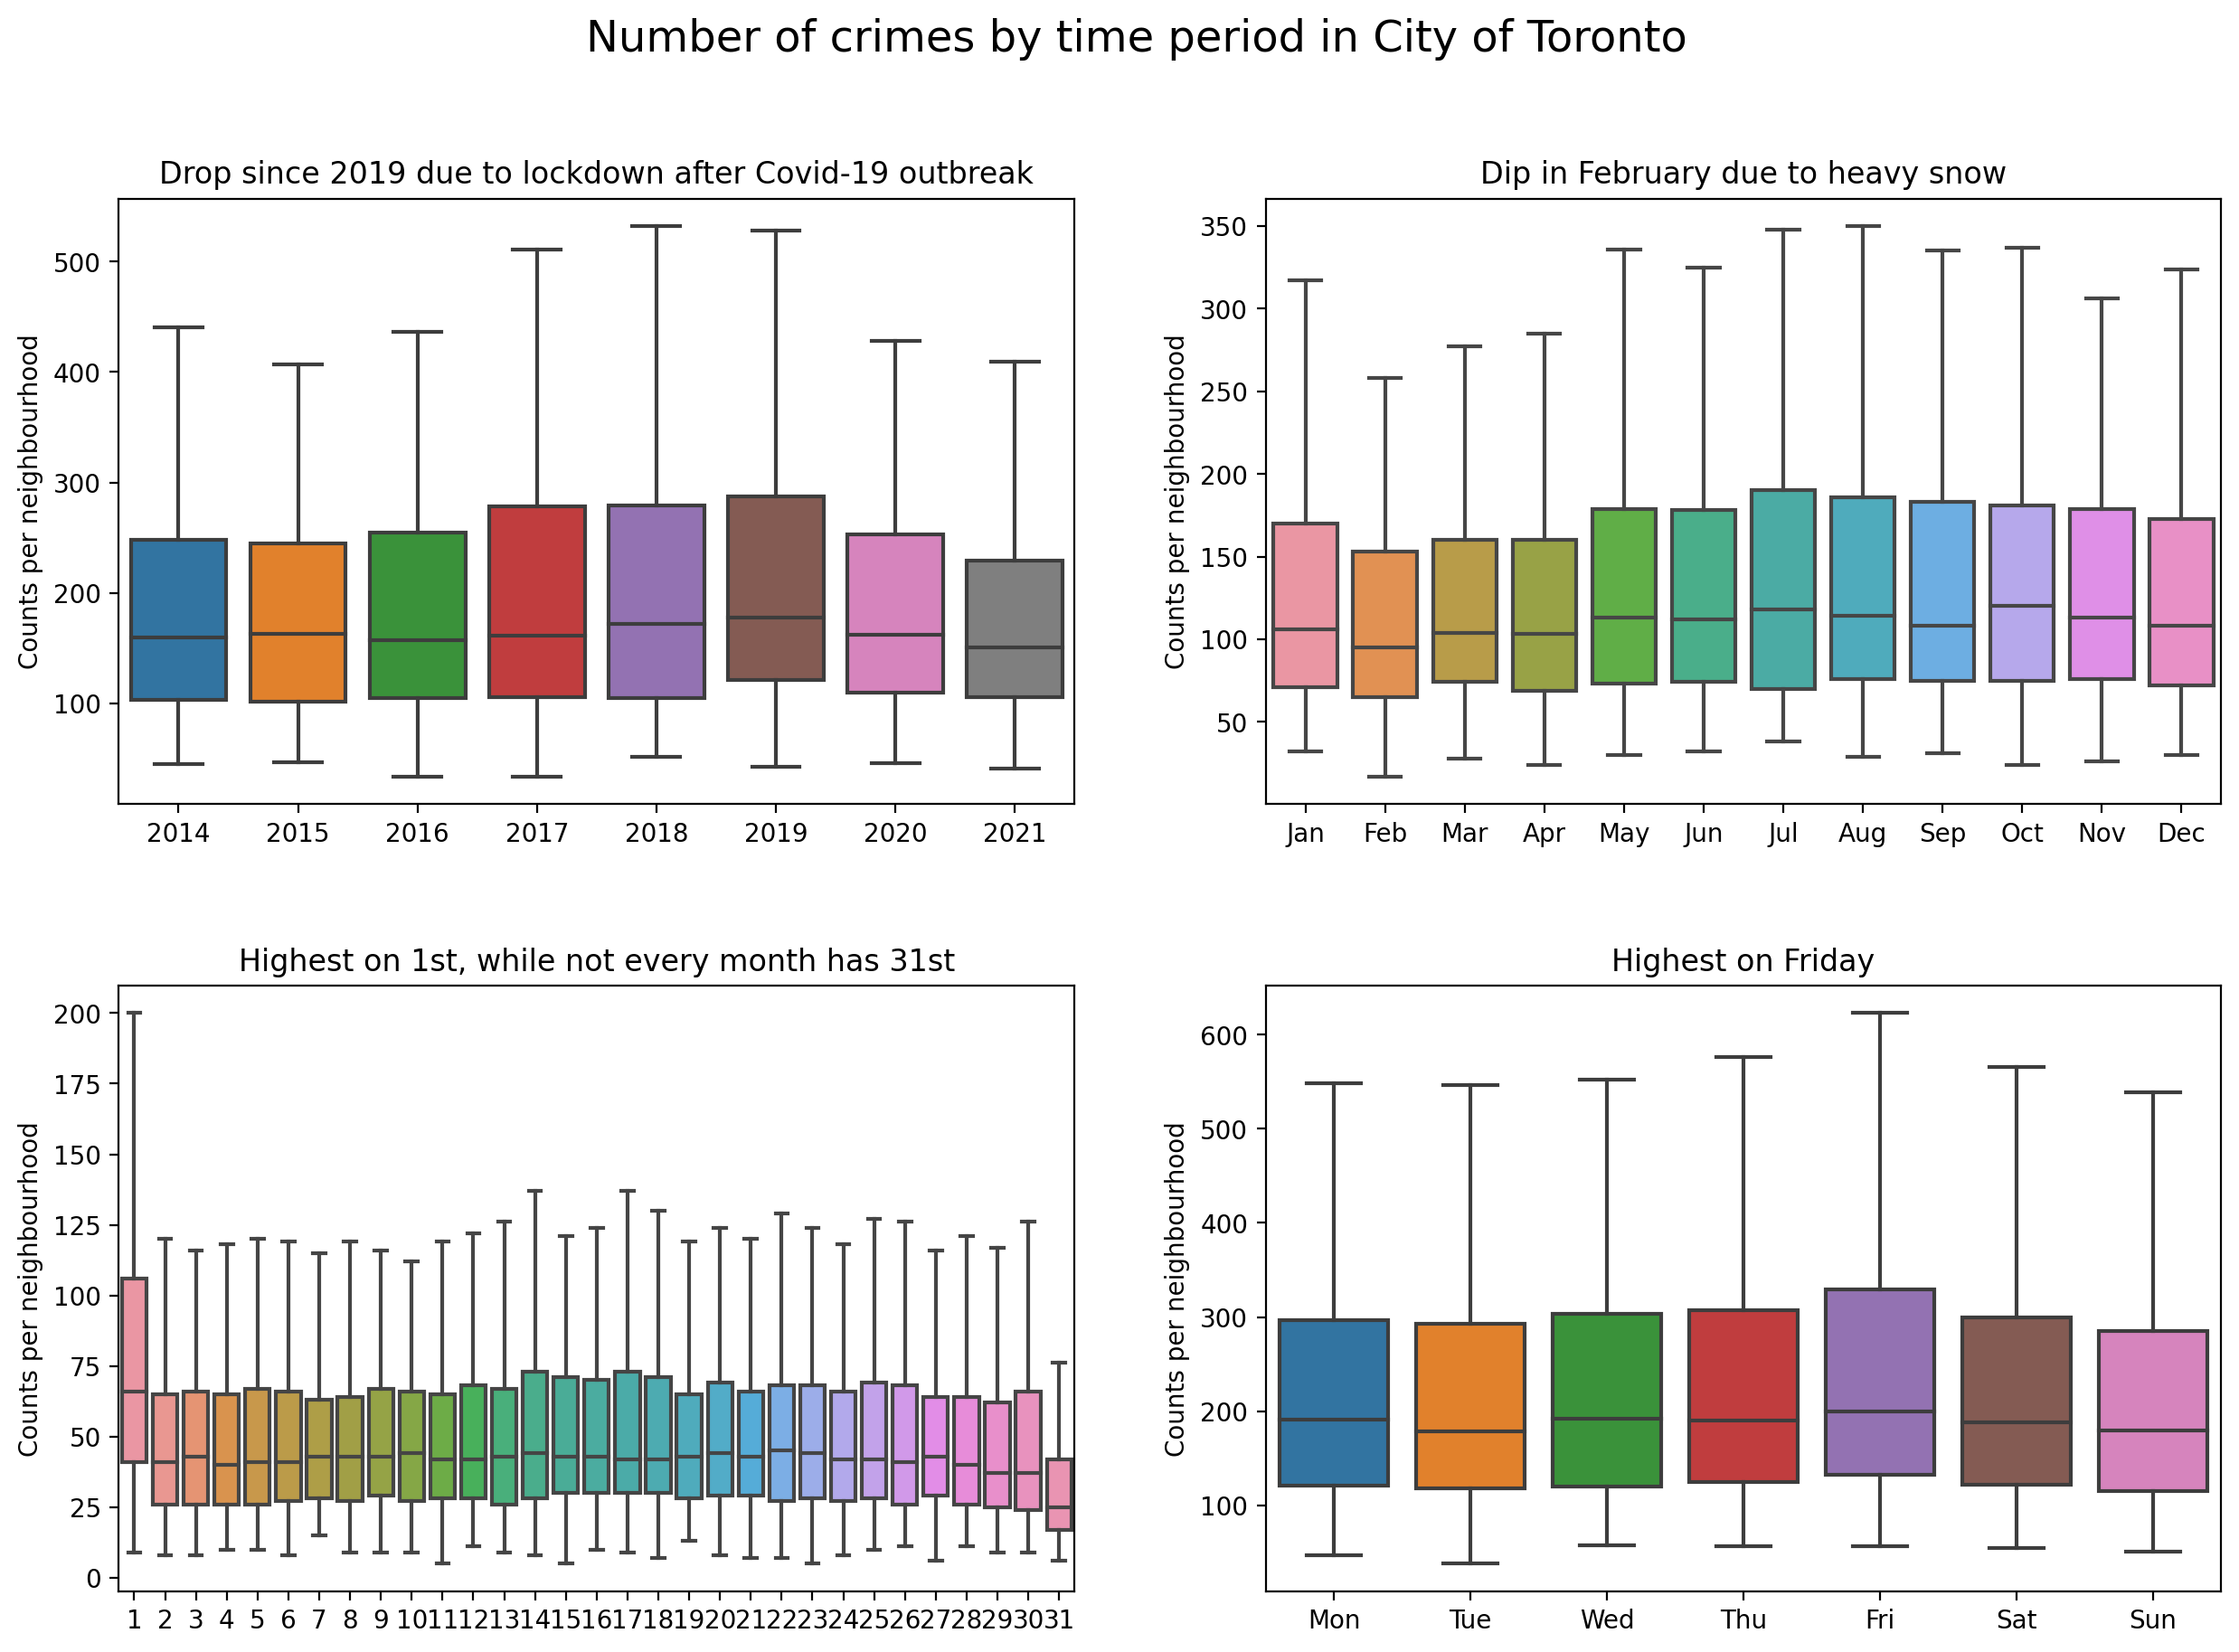

In [14]:
vars = ['occurrence_year', 
        'occurrence_month', 
        'occurrence_day',
        'occurrence_dayofweek']
vars_cat = [sorted(mci_select.occurrence_year.unique()),
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            np.arange(1,32,1),
            ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            ]
titles = ['Drop since 2019 due to lockdown and wfh after covid-19 outbreak',
         'Dip in February due to heavy snow',
         'Highest on 1st, while not every month has 31st',
         'Highest on Friday']

fig, axes = plt.subplots(int(len(vars)/2),2)
plt.subplots_adjust(hspace=0.3)
for var, var_cat, title, ax in zip(vars, vars_cat, titles, axes.flatten()):    
    mci_select[var] = mci_select[var].astype('category').cat.set_categories(var_cat)
    sns.boxplot(data = mci_select.groupby(['neighbourhood', var]).size().reset_index(name='count'), 
                x = var,
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(title)

fig.suptitle('Number of crimes by time period in City of Toronto', size='xx-large')

# Time trend by type of crime

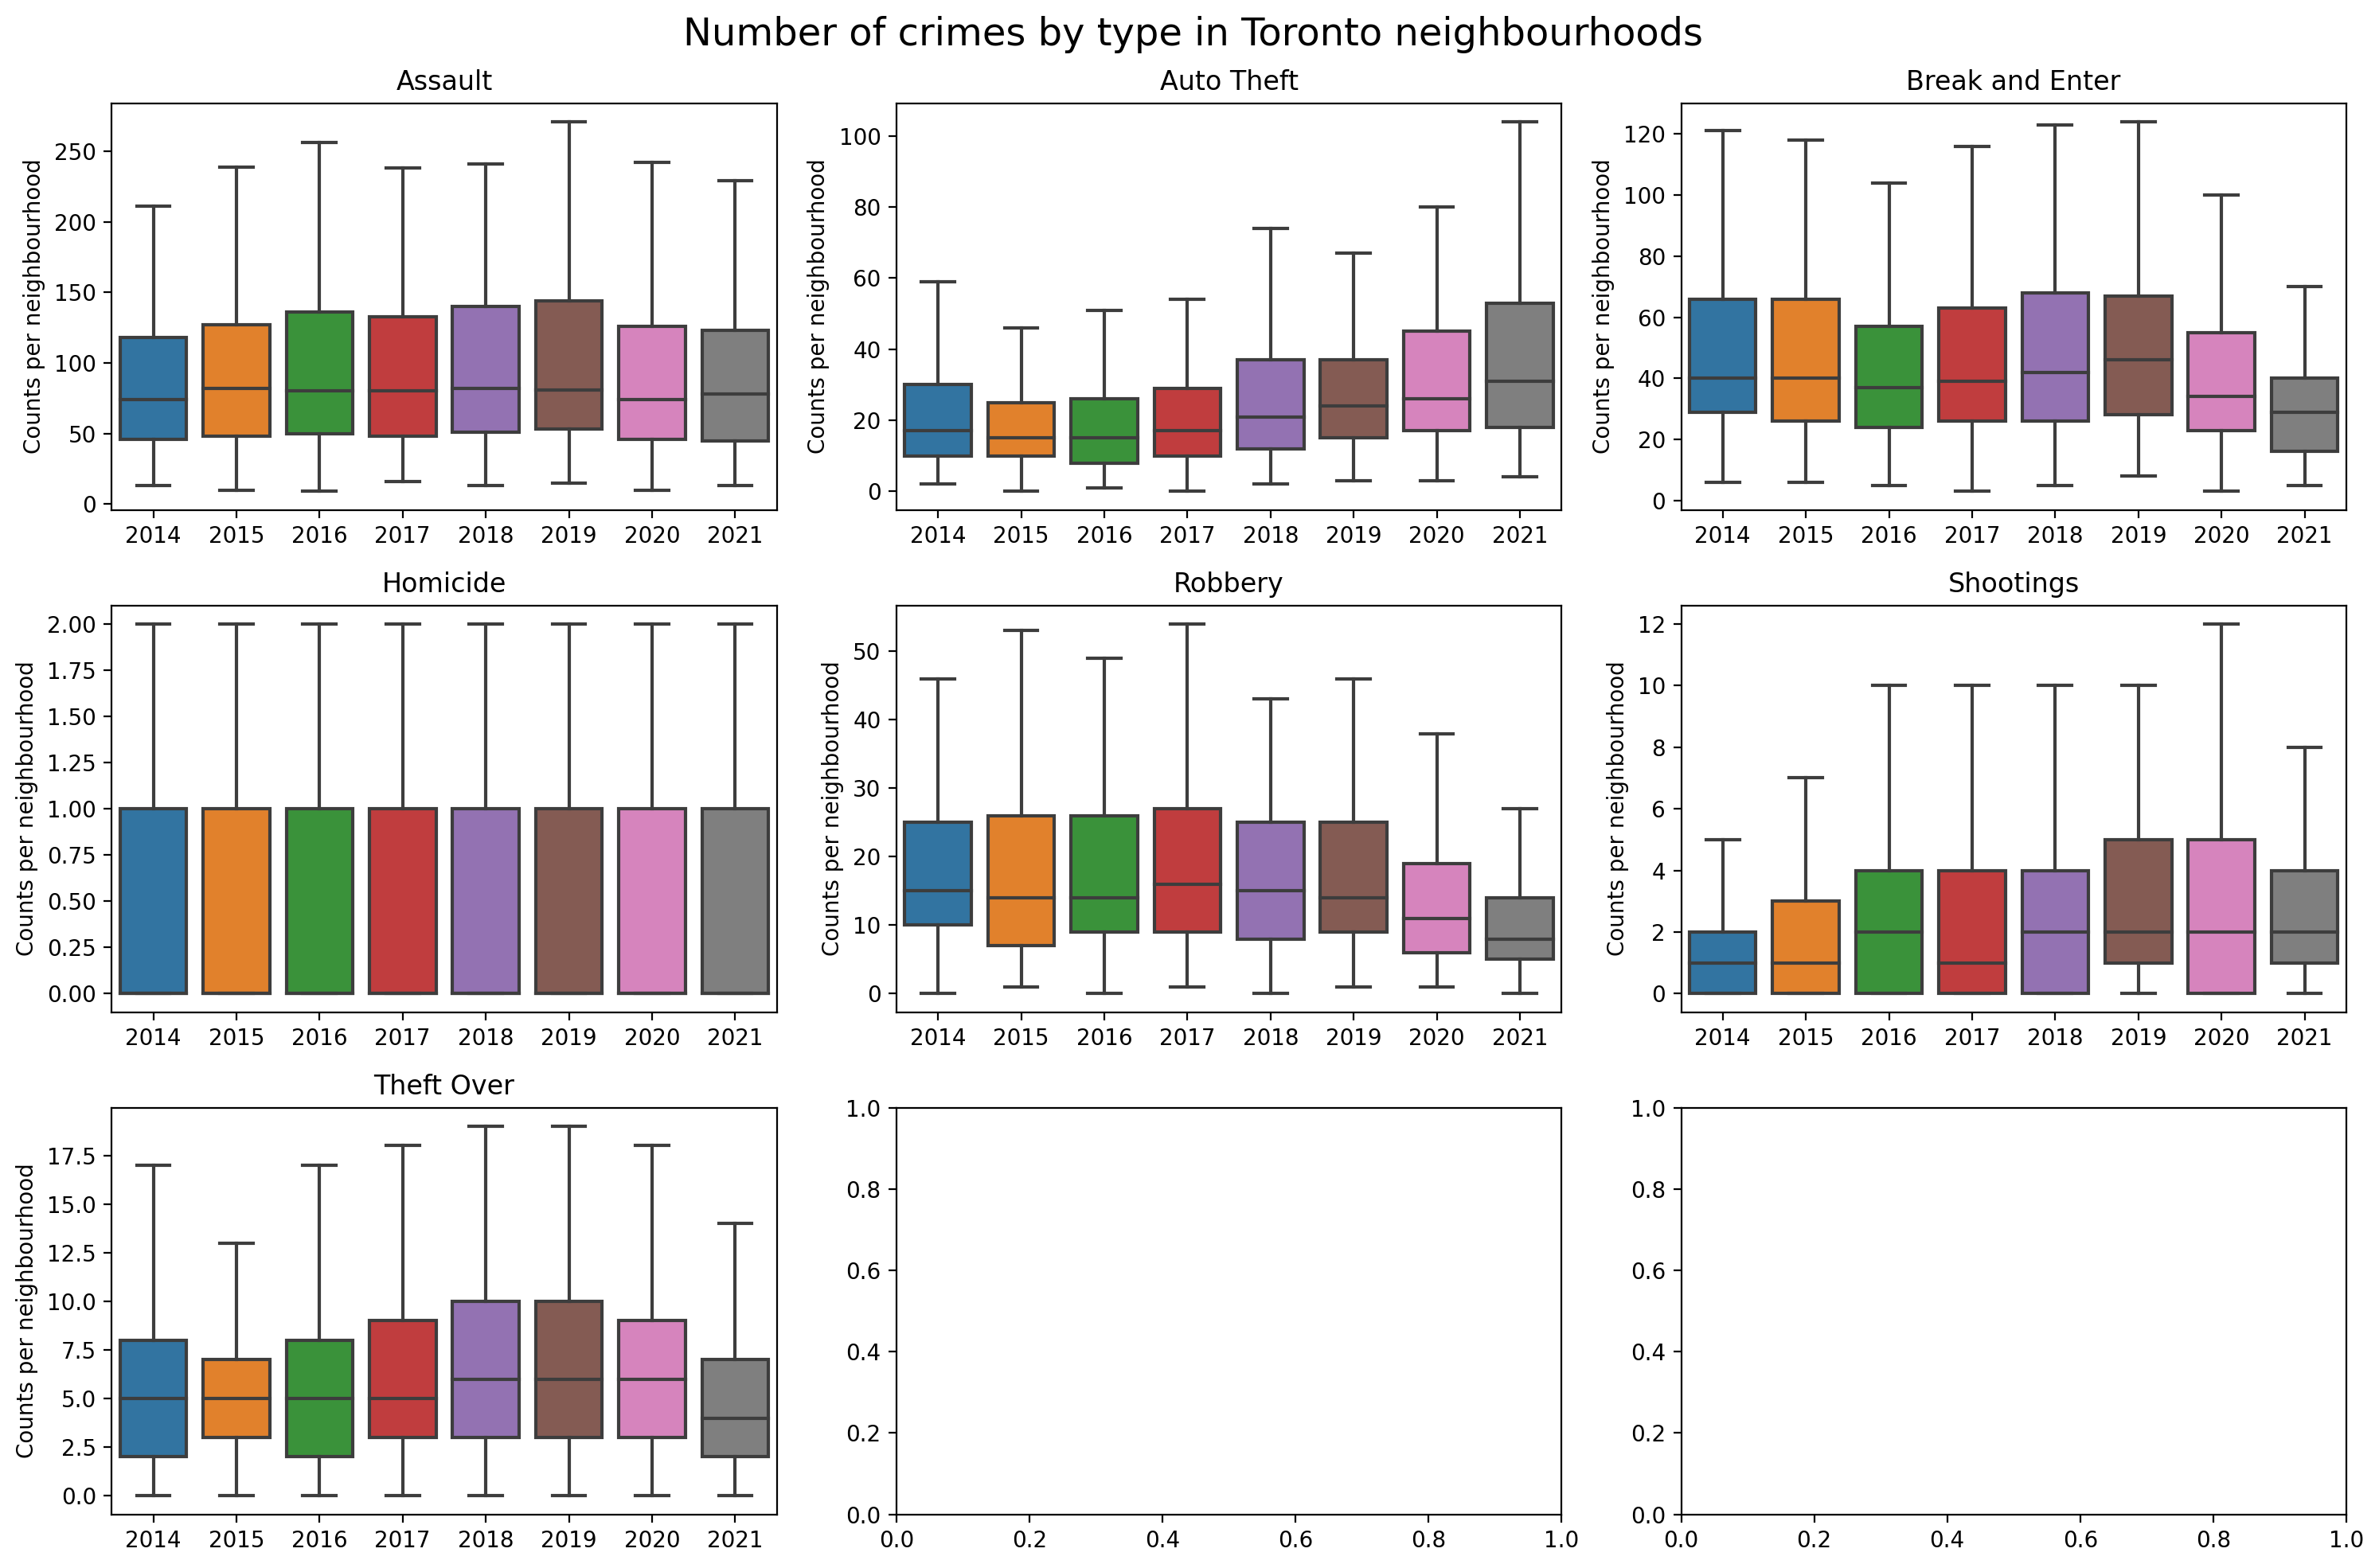

In [16]:
vars = sorted(mci_select.MCI.unique())
fig, axes = plt.subplots(int(math.ceil(len(vars)/3)),3)
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):    
    sns.boxplot(data = mci_select[mci_select.MCI == var].groupby(['neighbourhood', 'occurrence_year']).size().reset_index(name='count'), 
                x = 'occurrence_year',
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(f"{var}")

fig.suptitle('Number of crimes by type in Toronto neighbourhoods', size='xx-large')
plt.tight_layout()

# Neighbourhood crime rate and density

In [17]:
crime_by_quarter = pd.read_csv('../data/processed/neighbourhoods_crime.csv')
crime_by_quarter.hood_id = crime_by_quarter.hood_id.astype(str)
crime_by_quarter

neighbourhood hood_id  occurrence_year  occurrence_quarter  \
0       West Humber-Clairville       1             2014                   1   
1       West Humber-Clairville       1             2014                   1   
2       West Humber-Clairville       1             2014                   1   
3       West Humber-Clairville       1             2014                   1   
4       West Humber-Clairville       1             2014                   1   
...                        ...     ...              ...                 ...   
107515     Mount Pleasant East      99             2021                   4   
107516     Mount Pleasant East      99             2021                   1   
107517     Mount Pleasant East      99             2021                   2   
107518     Mount Pleasant East      99             2021                   3   
107519     Mount Pleasant East      99             2021                   4   

             area  population              MCI     type      value  
0       30.145103       34745          Assault    count  45.000000  
1       30.145103       34745       Auto Theft    count  64.000000  
2       30.145103       34745  Break and Enter    count  41.000000  
3       30.145103       34745         Homicide    count   0.000000  
4       30.145103       34745          Robbery    count  10.000000  
...           ...         ...              ...      ...        ...  
107515   3.088880       18261       Theft Over  density   0.000000  
107516   3.088880       18261              MCI  density   6.474839  
107517   3.088880       18261              MCI  density  10.359742  
107518   3.088880       18261              MCI  density   8.741033  
107519   3.088880       18261              MCI  density   9.388516  

[107520 rows x 9 columns]

In [18]:
crime_by_year = crime_by_quarter.groupby(['hood_id', 'occurrence_year', 'MCI', 'type']).value.sum().reset_index()
crime_by_year

hood_id  occurrence_year         MCI     type       value
0           1             2014     Assault    count  246.000000
1           1             2014     Assault  density    8.160530
2           1             2014     Assault     rate  708.015542
3           1             2014  Auto Theft    count  299.000000
4           1             2014  Auto Theft  density    9.918692
...       ...              ...         ...      ...         ...
26875      99             2021   Shootings  density    0.000000
26876      99             2021   Shootings     rate    0.000000
26877      99             2021  Theft Over    count    3.000000
26878      99             2021  Theft Over  density    0.971226
26879      99             2021  Theft Over     rate   16.428454

[26880 rows x 5 columns]

In [19]:
neighbourhoods = gpd.read_file('../data/processed/neighbourhoods.geojson')

In [20]:
neighbourhoods_crime = neighbourhoods[['hood_id', 'geometry']].drop_duplicates(subset = 'hood_id').merge(crime_by_year, on='hood_id', how='inner')
neighbourhoods_crime

hood_id                                           geometry  \
0           1  POLYGON ((-79.55235 43.70947, -79.55237 43.709...   
1           1  POLYGON ((-79.55235 43.70947, -79.55237 43.709...   
2           1  POLYGON ((-79.55235 43.70947, -79.55237 43.709...   
3           1  POLYGON ((-79.55235 43.70947, -79.55237 43.709...   
4           1  POLYGON ((-79.55235 43.70947, -79.55237 43.709...   
...       ...                                                ...   
26875      99  POLYGON ((-79.37747 43.71309, -79.37737 43.712...   
26876      99  POLYGON ((-79.37747 43.71309, -79.37737 43.712...   
26877      99  POLYGON ((-79.37747 43.71309, -79.37737 43.712...   
26878      99  POLYGON ((-79.37747 43.71309, -79.37737 43.712...   
26879      99  POLYGON ((-79.37747 43.71309, -79.37737 43.712...   

       occurrence_year         MCI     type       value  
0                 2014     Assault    count  246.000000  
1                 2014     Assault  density    8.160530  
2                 2014     Assault     rate  708.015542  
3                 2014  Auto Theft    count  299.000000  
4                 2014  Auto Theft  density    9.918692  
...                ...         ...      ...         ...  
26875             2021   Shootings  density    0.000000  
26876             2021   Shootings     rate    0.000000  
26877             2021  Theft Over    count    3.000000  
26878             2021  Theft Over  density    0.971226  
26879             2021  Theft Over     rate   16.428454  

[26880 rows x 6 columns]

In [21]:
crime_type = neighbourhoods_crime.MCI.unique()
crime_type

array(['Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'MCI',
       'Robbery', 'Shootings', 'Theft Over'], dtype=object)

In [22]:
# set custom order for display
custom_crime_order = ['MCI','Assault', 'Auto Theft','Break and Enter','Robbery','Theft Over','Homicide','Shootings']
crime_years = sorted(neighbourhoods_crime.occurrence_year.unique())

In [28]:
def plot_crime(var, title):
    fig, axes = plt.subplots(len(crime_years), len(custom_crime_order))

    for j in range(axes.shape[1]):
        # fix the range for each type of crime so we can compare across years
        vmin, vmax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                          (neighbourhoods_crime['type'] == var)].value.agg(['min', 'max'])
        norm = TwoSlopeNorm(vmin=vmin, vcenter= np.mean([vmin, vmax]), vmax=vmax)
        print("printing", custom_crime_order[j])
        for i in range(axes.shape[0]):  
            try:
                neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                     (neighbourhoods_crime['occurrence_year'] == crime_years[i]) & 
                                     (neighbourhoods_crime['type'] == var)].\
                                         plot(column = 'value', 
                                              cmap = 'viridis',
                                              norm = norm,
                                              ax = axes[i, j])
            except:
                print(f"problem with {custom_crime_order[j]} and {crime_years[i]}")
                break
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].set_yticks([])
            if i == 0:
                axes[i,j].set_title(custom_crime_order[j])
            if j == 0:
                axes[i,j].set_ylabel(crime_years[i], rotation=90, size='large')

    title = title + "\n(normalized by each crime type)"
    fig.suptitle(title, size='xx-large')

## plot map

printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


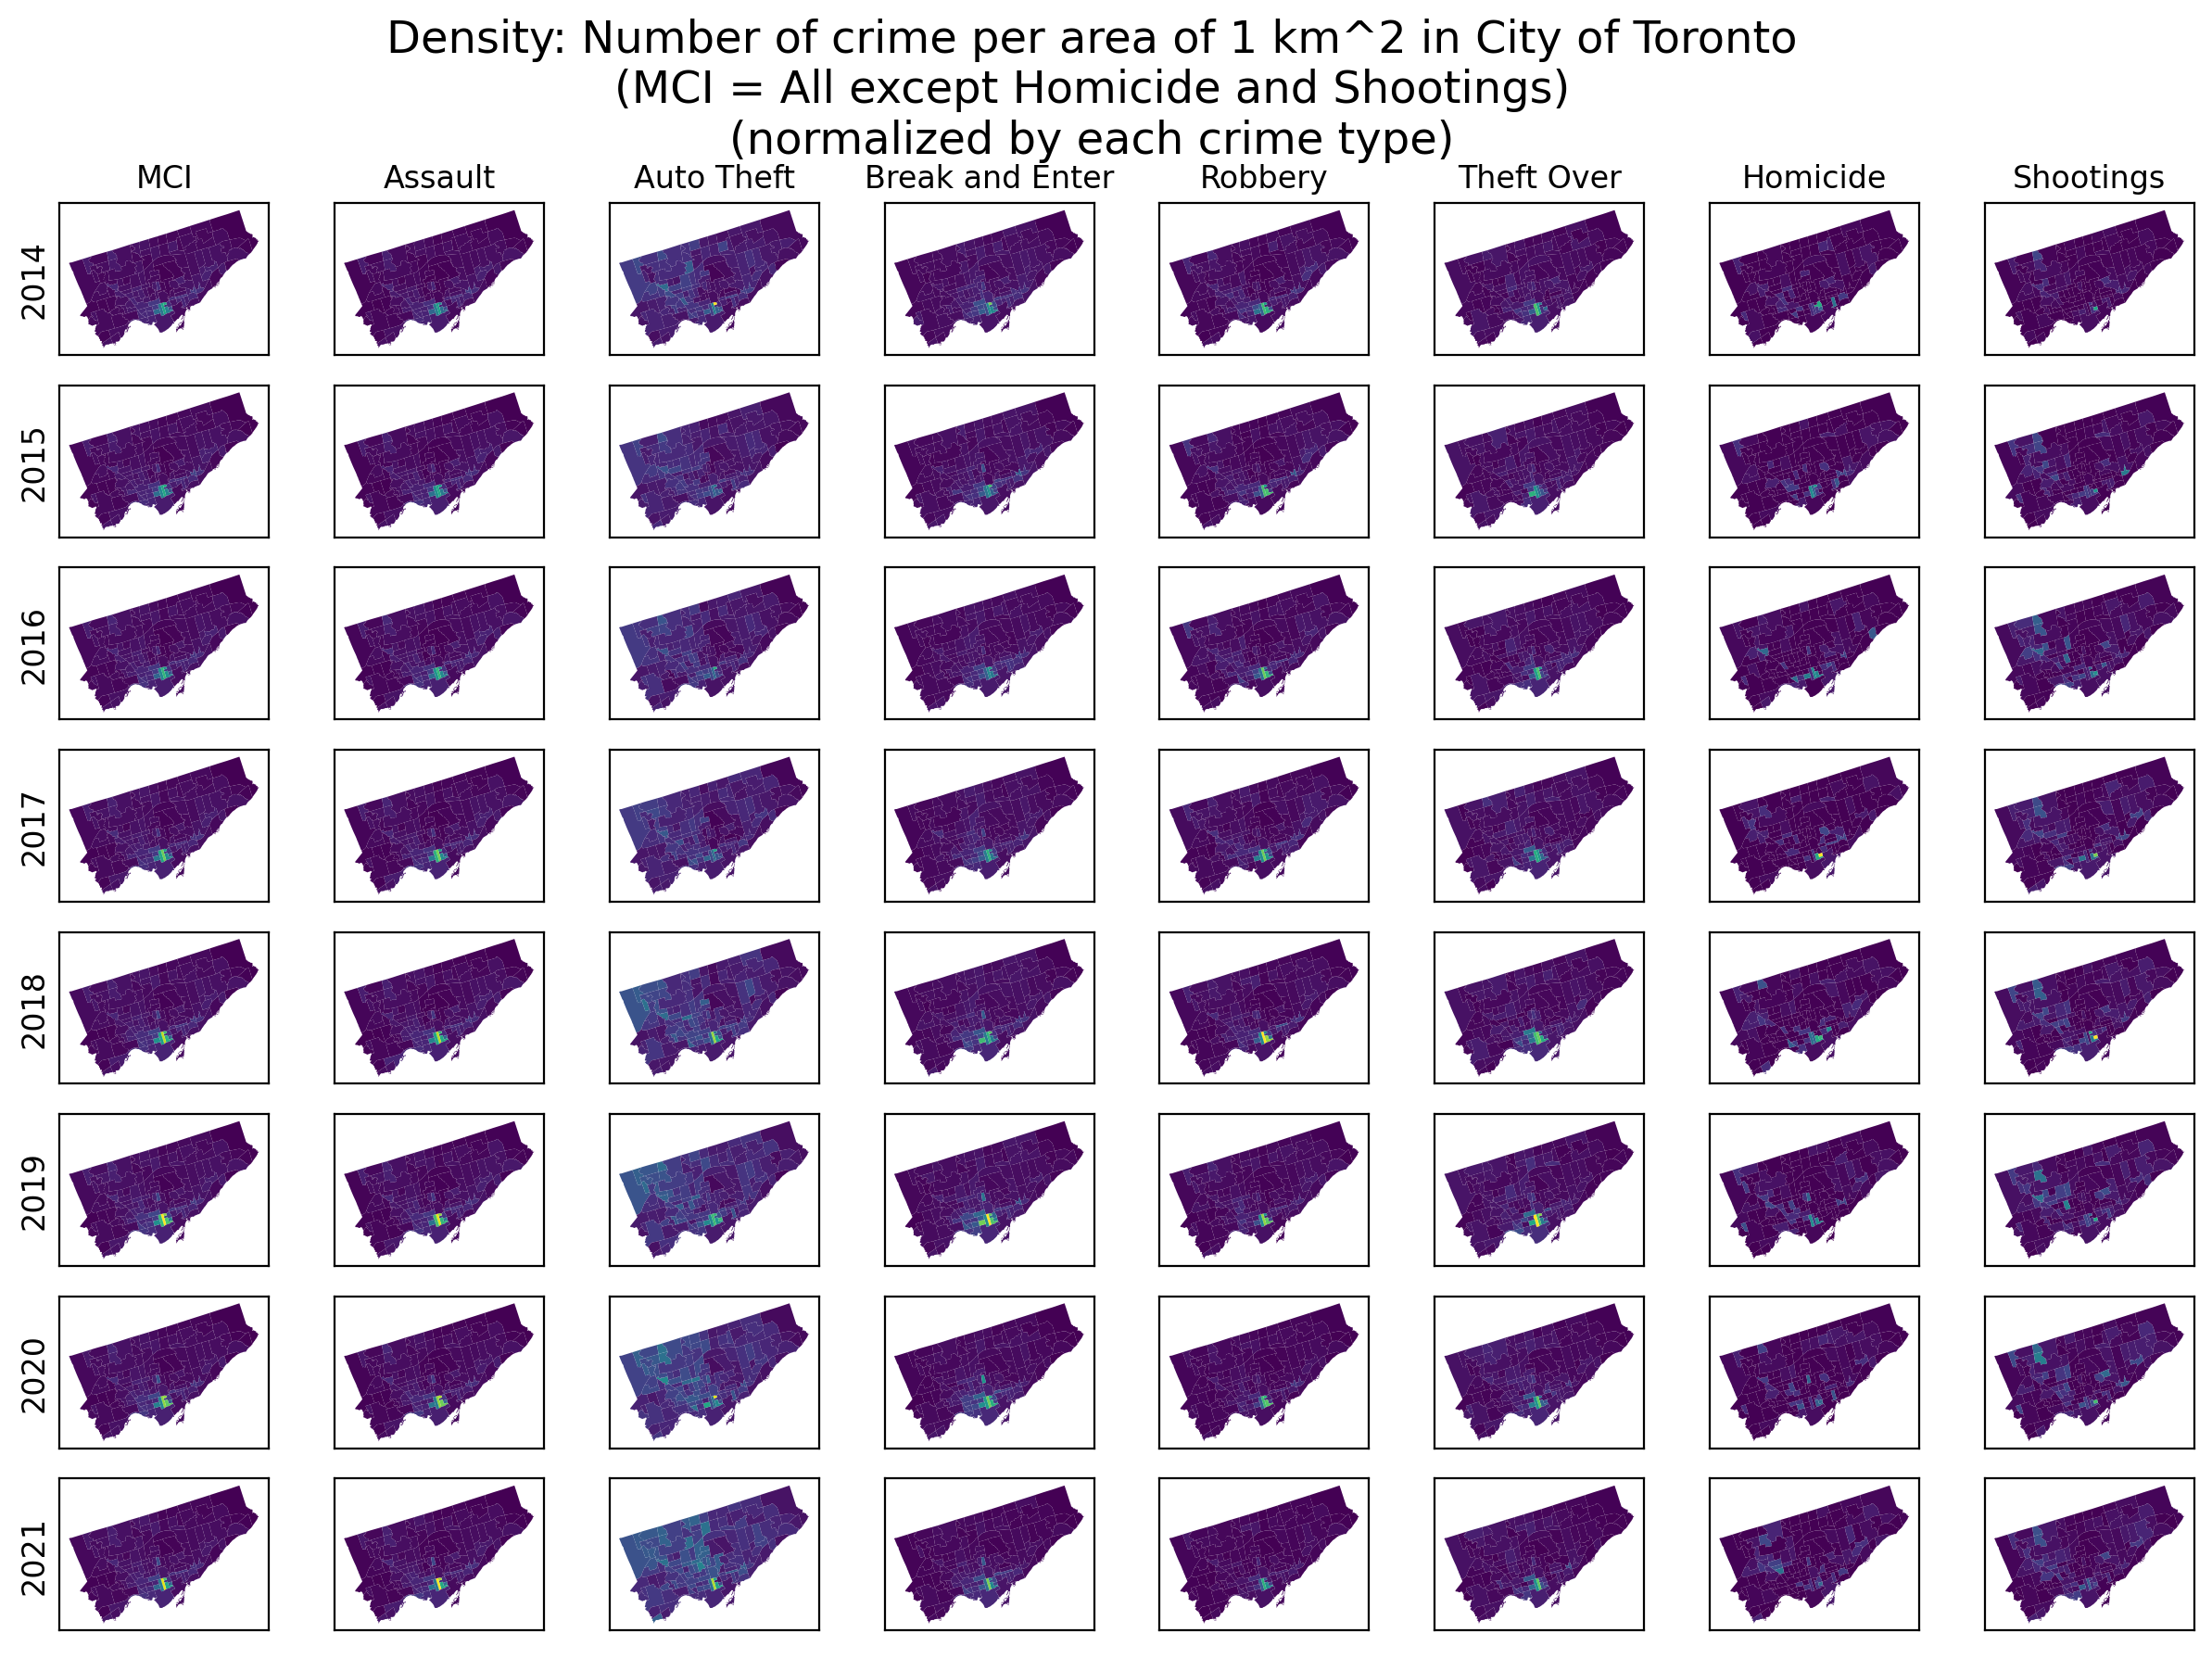

In [29]:
plot_crime('density', 'Density: Number of crime per area of 1 km^2 in City of Toronto\n(MCI = All except Homicide and Shootings)')

printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


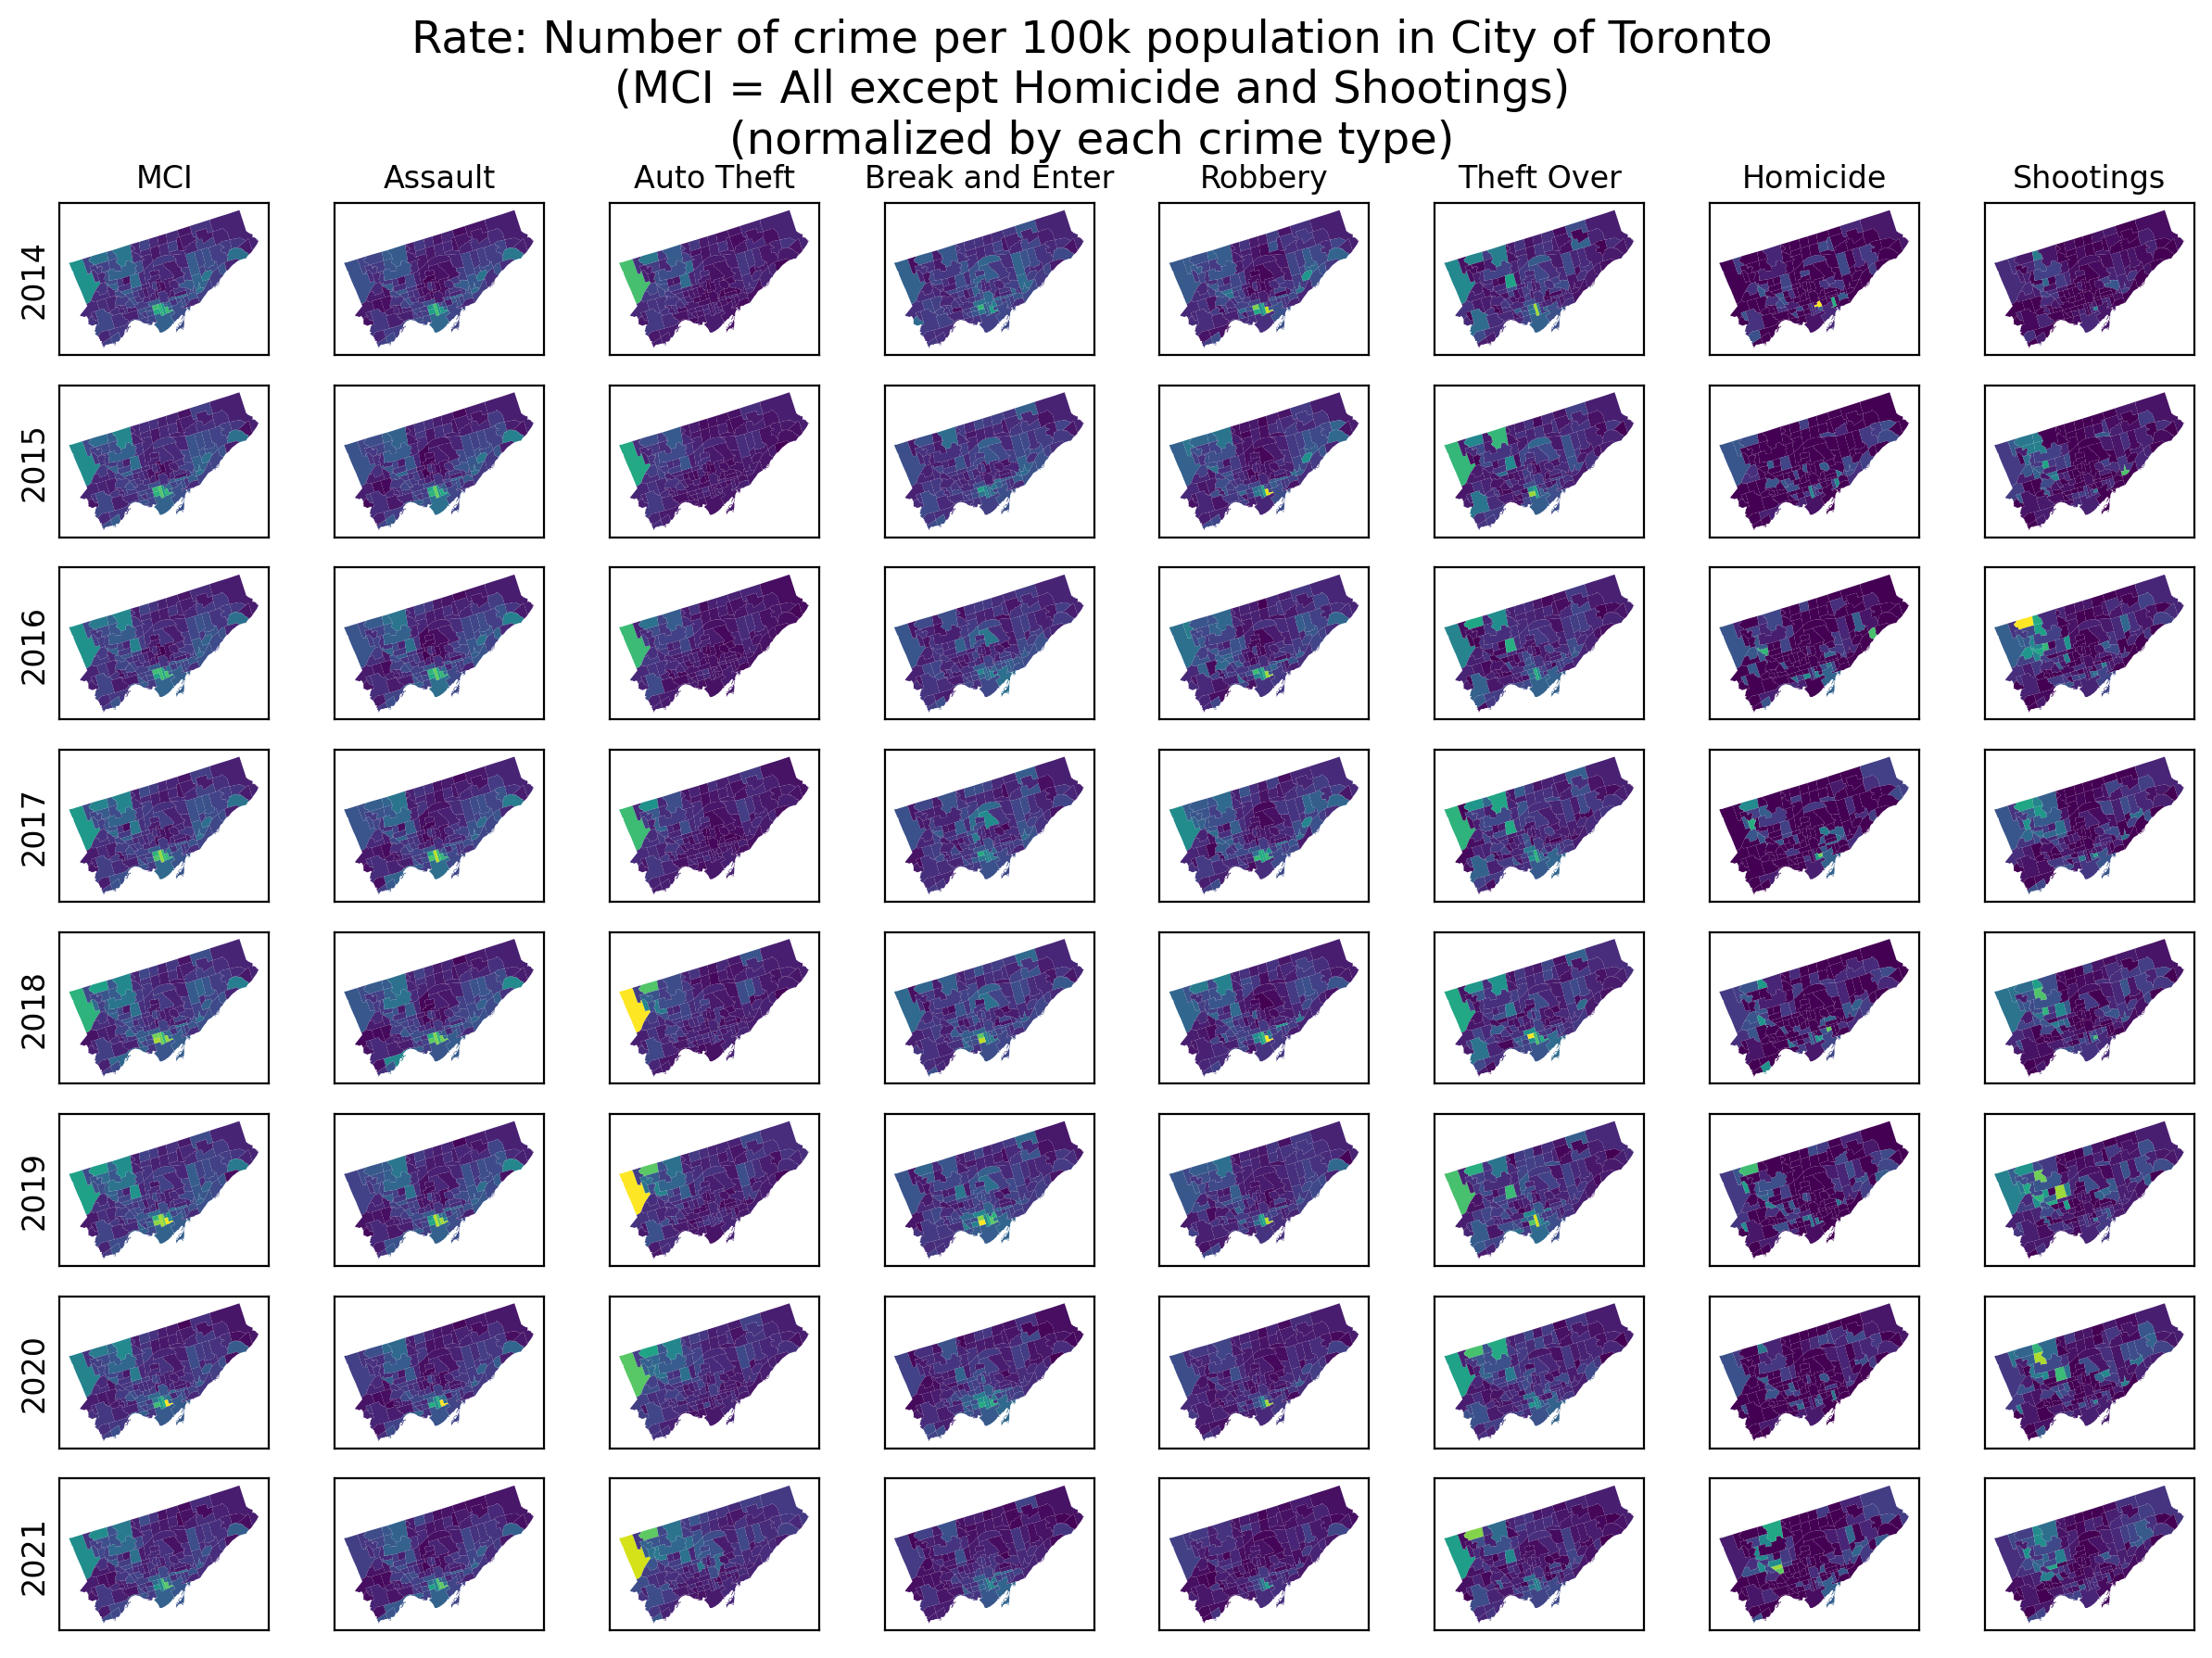

In [30]:
plot_crime('rate', 'Rate: Number of crime per 100k population in City of Toronto\n(MCI = All except Homicide and Shootings)')

printing MCI
printing Assault
printing Auto Theft
printing Break and Enter
printing Robbery
printing Theft Over
printing Homicide
printing Shootings


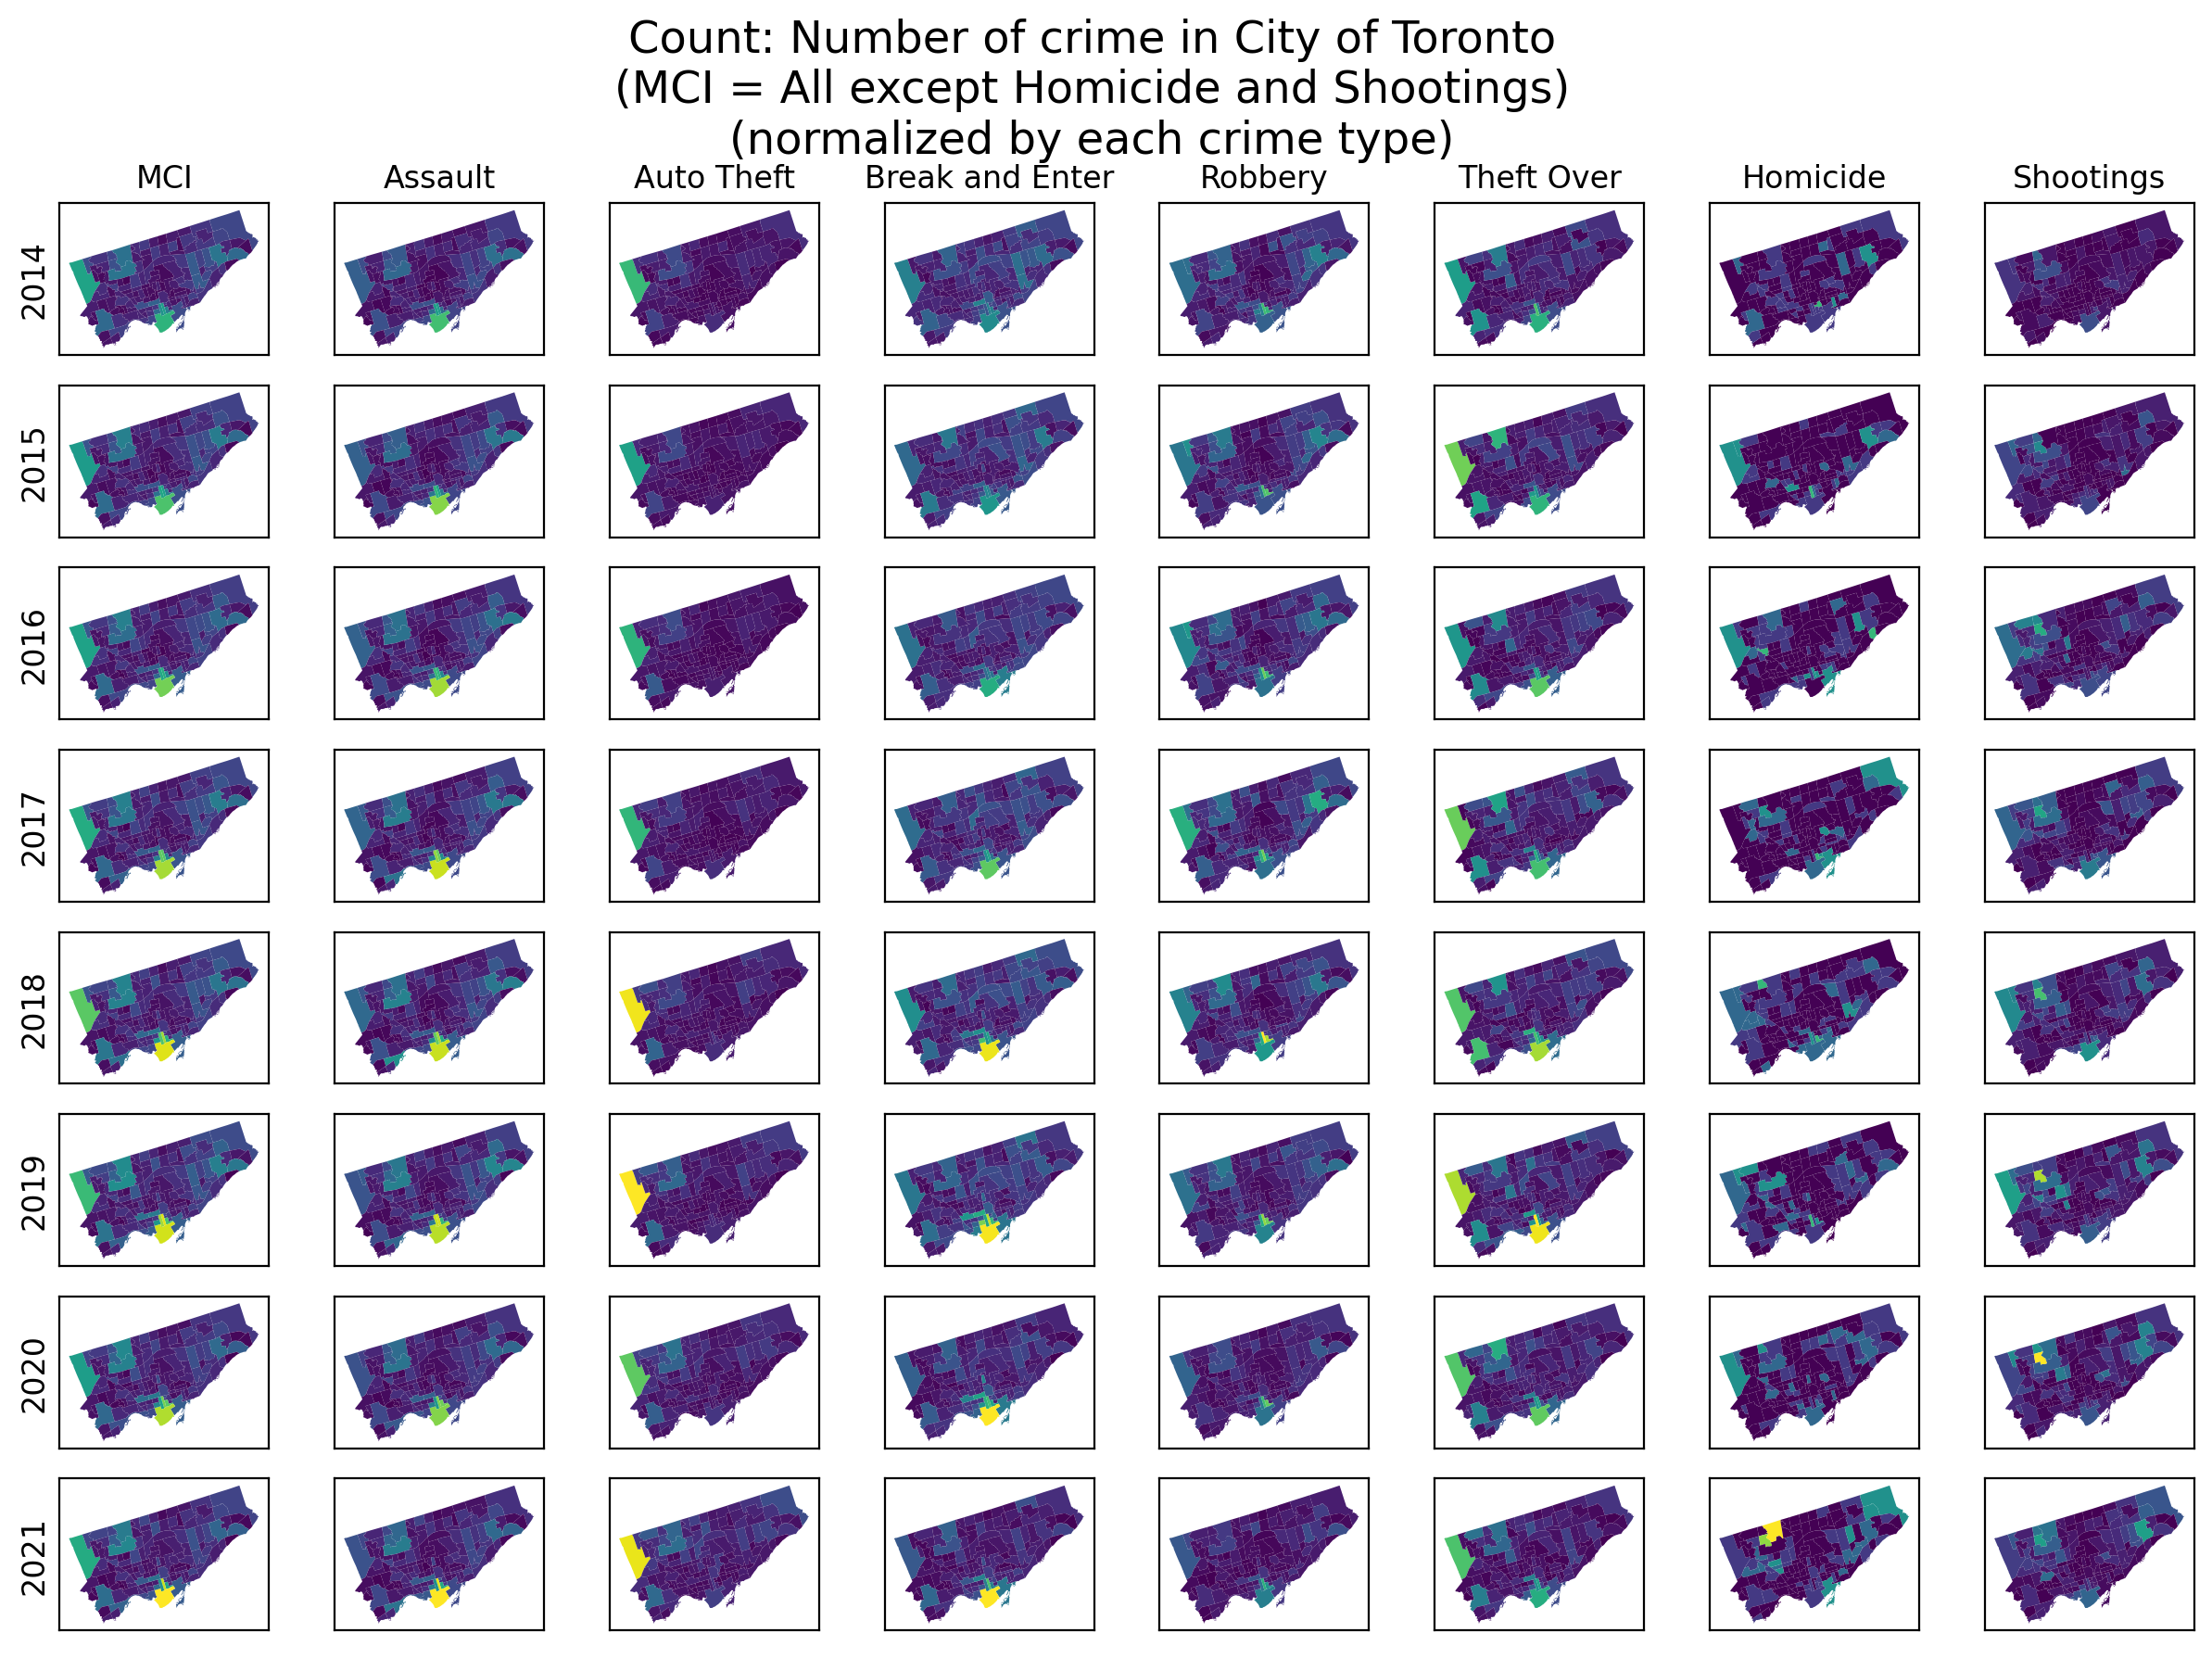

In [31]:
plot_crime('count', 'Count: Number of crime in City of Toronto\n(MCI = All except Homicide and Shootings)')

Text(0.5, 257.537970073787, 'Longitude')

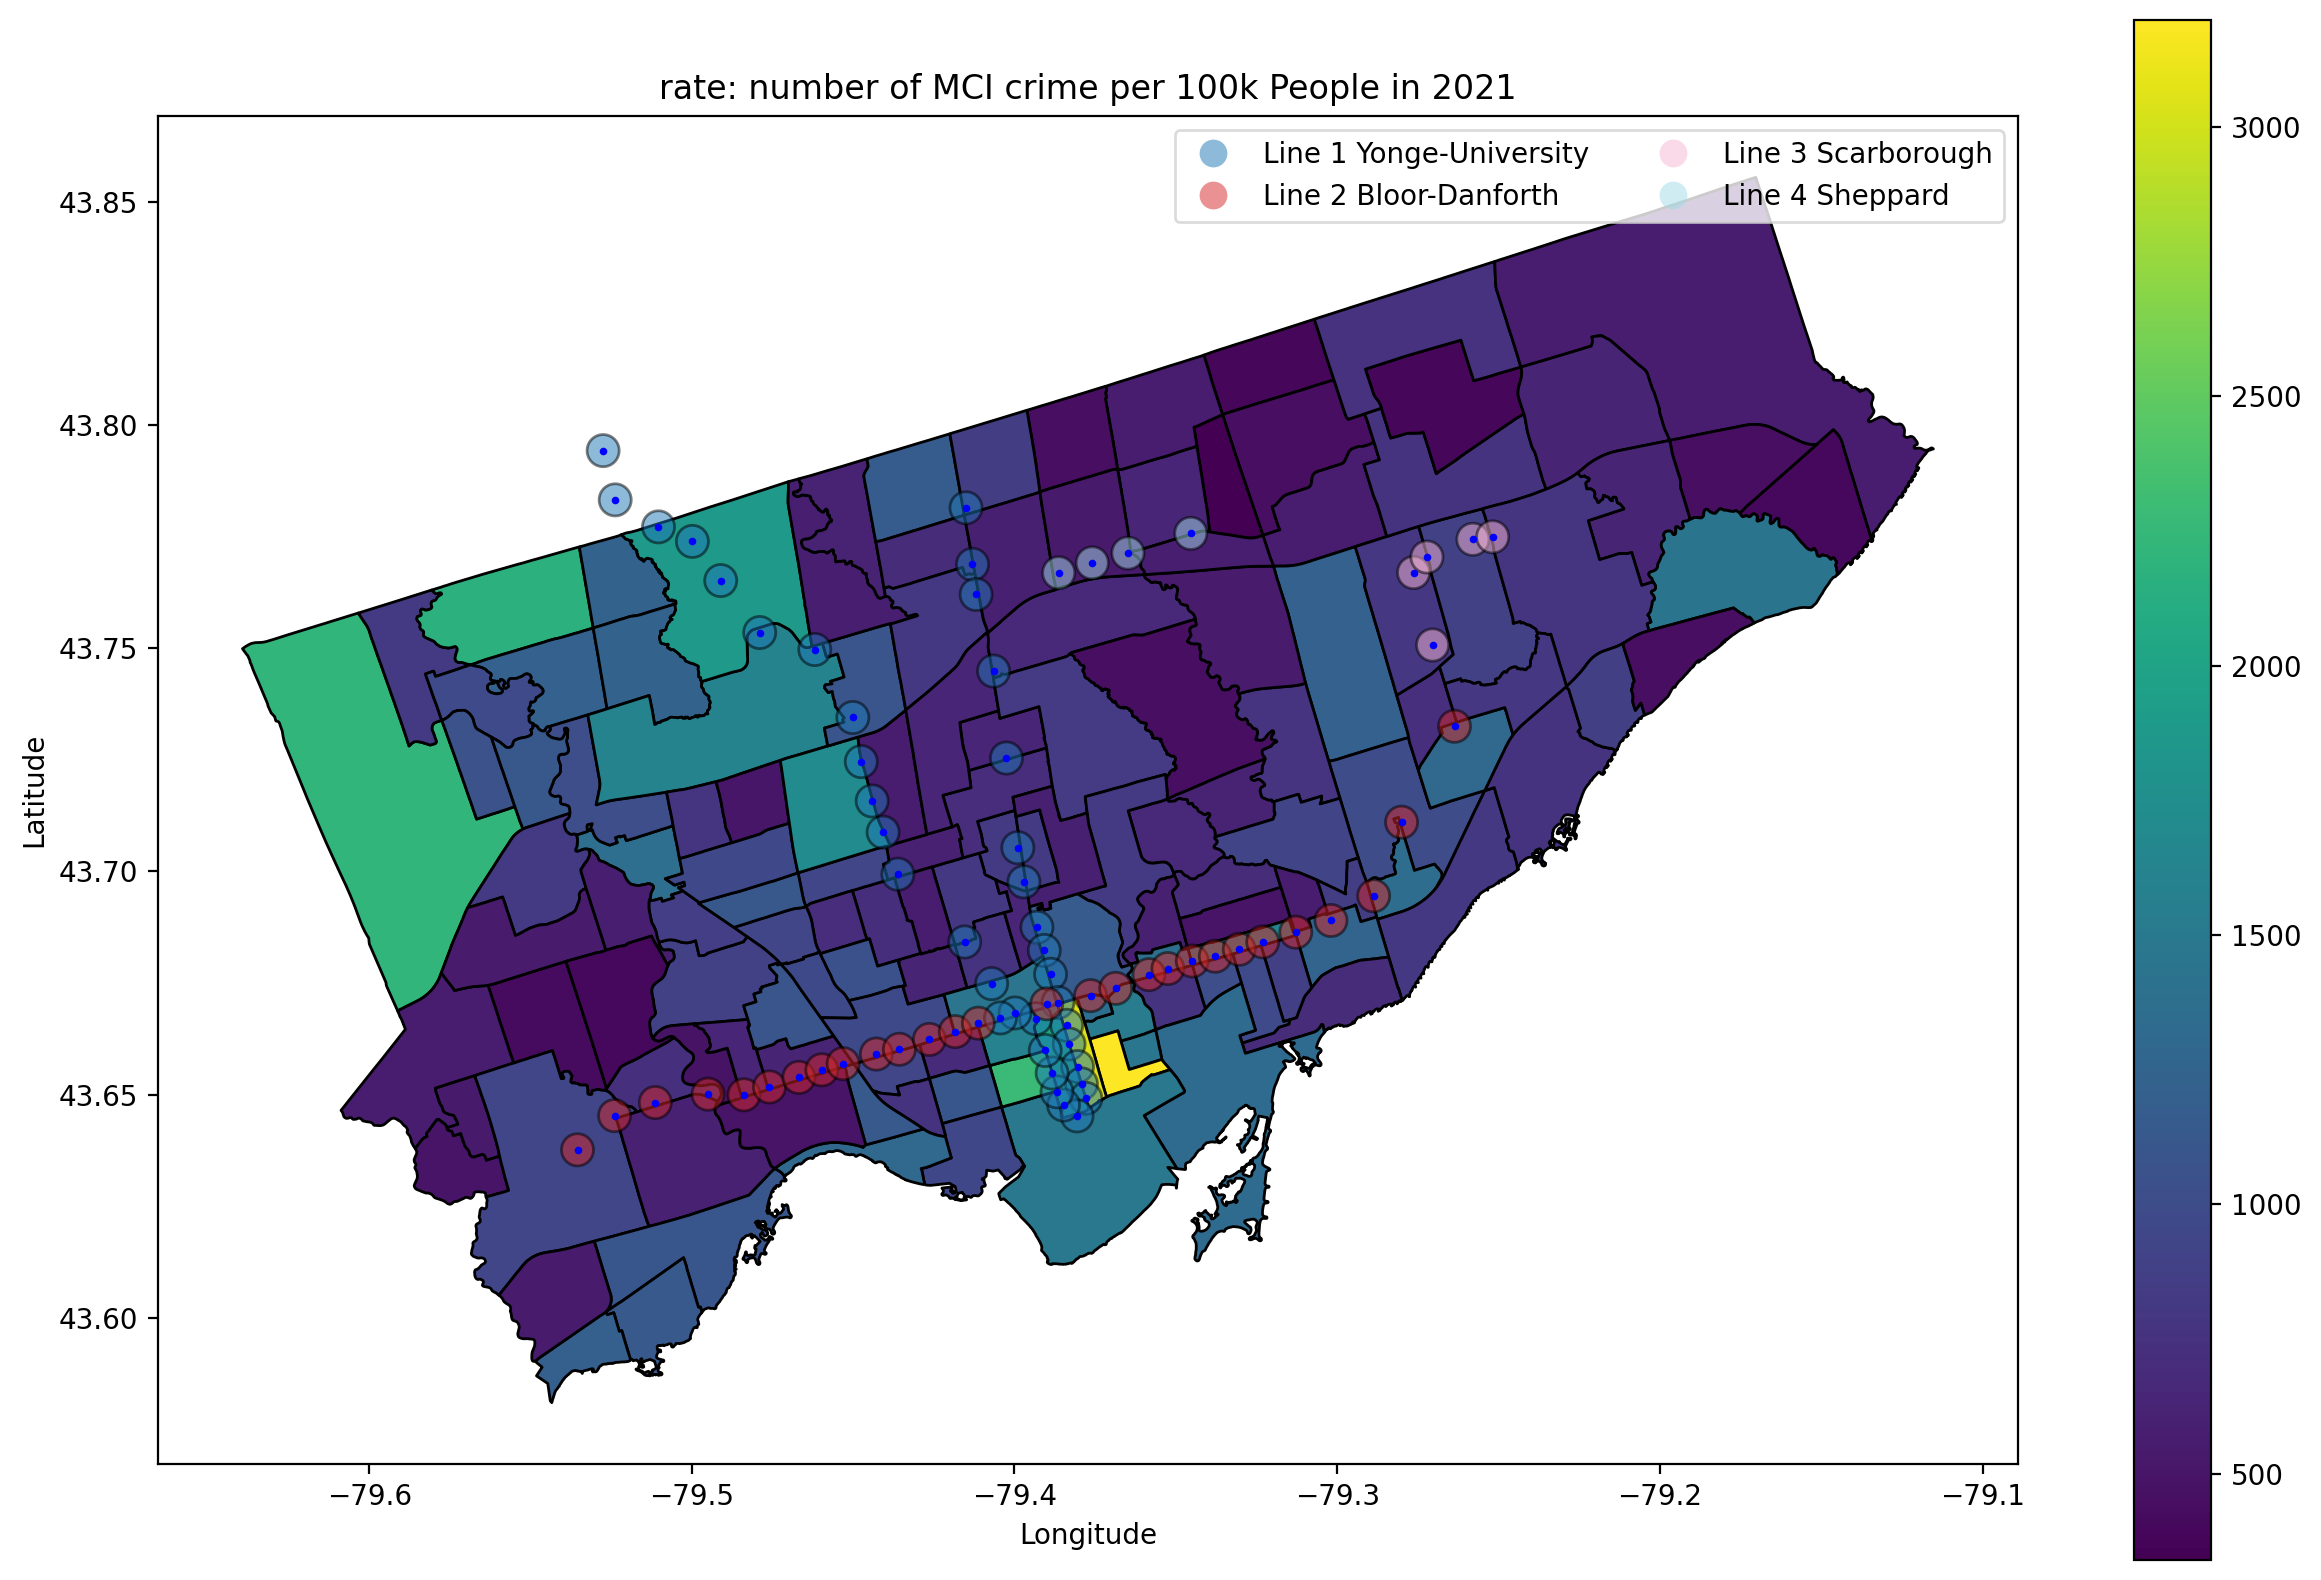

In [36]:
var = "rate"
MCI_type = "MCI"
year = neighbourhoods_crime['occurrence_year'].max()
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['occurrence_year'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   # norm = norm,
                                   legend = True)

stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'upper right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

ax.set_title(var + f": number of {MCI_type} crime per 100k People in {year}")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

# Crime around subway stations

In [37]:
mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
mci_point = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

c:\Users\willi\miniconda3\envs\police\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [38]:
custom_crime_order

['MCI',
 'Assault',
 'Auto Theft',
 'Break and Enter',
 'Robbery',
 'Theft Over',
 'Homicide',
 'Shootings']

In [48]:
year = neighbourhoods_crime['occurrence_year'].max()
crime_around_stations = gpd.sjoin(mci_point.loc[(mci_point['occurrence_year'] == year), ['occurrence_unique_id', 'hood_id', 'MCI', 'geometry']], 
                                  stations_area[['station', 'geometry']],
                                  predicate='intersects')
crime_around_stations

occurrence_unique_id hood_id              MCI  \
20744          GO-202122996      14          Assault   
20751          GO-202150337      14          Assault   
20761         GO-2021148145      14  Break and Enter   
20766         GO-2021157512      14  Break and Enter   
20790         GO-2021298954      14          Assault   
...                     ...     ...              ...   
239465       GO-20211987682     137       Auto Theft   
239647        GO-2021217650     137          Robbery   
239703        GO-2021589809     137          Assault   
240140        GO-2021835964     137       Auto Theft   
247504       GO-20212463489     127        Shootings   

                          geometry  index_right    station  
20744   POINT (-79.52686 43.64789)           39  islington  
20751   POINT (-79.52686 43.64789)           39  islington  
20761   POINT (-79.52560 43.64419)           39  islington  
20766   POINT (-79.52560 43.64419)           39  islington  
20790   POINT (-79.52547 43.64721)           39  islington  
...                            ...          ...        ...  
239465  POINT (-79.24981 43.77252)           70    mccowan  
239647  POINT (-79.25146 43.77214)           70    mccowan  
239703  POINT (-79.25050 43.77667)           70    mccowan  
240140  POINT (-79.25050 43.77667)           70    mccowan  
247504  POINT (-79.25220 43.77457)           70    mccowan  

[7117 rows x 6 columns]

In [49]:
station_rank = crime_around_stations.groupby(['station']).size().sort_values(ascending=False).reset_index(name = 'crime_count')
station_rank

station  crime_count
0            dundas          613
1           college          399
2         wellesley          361
3             queen          358
4       bloor yonge          352
..              ...          ...
68  york university           14
69         old mill           10
70   downsview park            9
71  pioneer village            8
72        ellesmere            5

[73 rows x 2 columns]

Text(0.5, 1.0, 'Distribution of crime around stations seems in line with crime density across neighbourhoods')

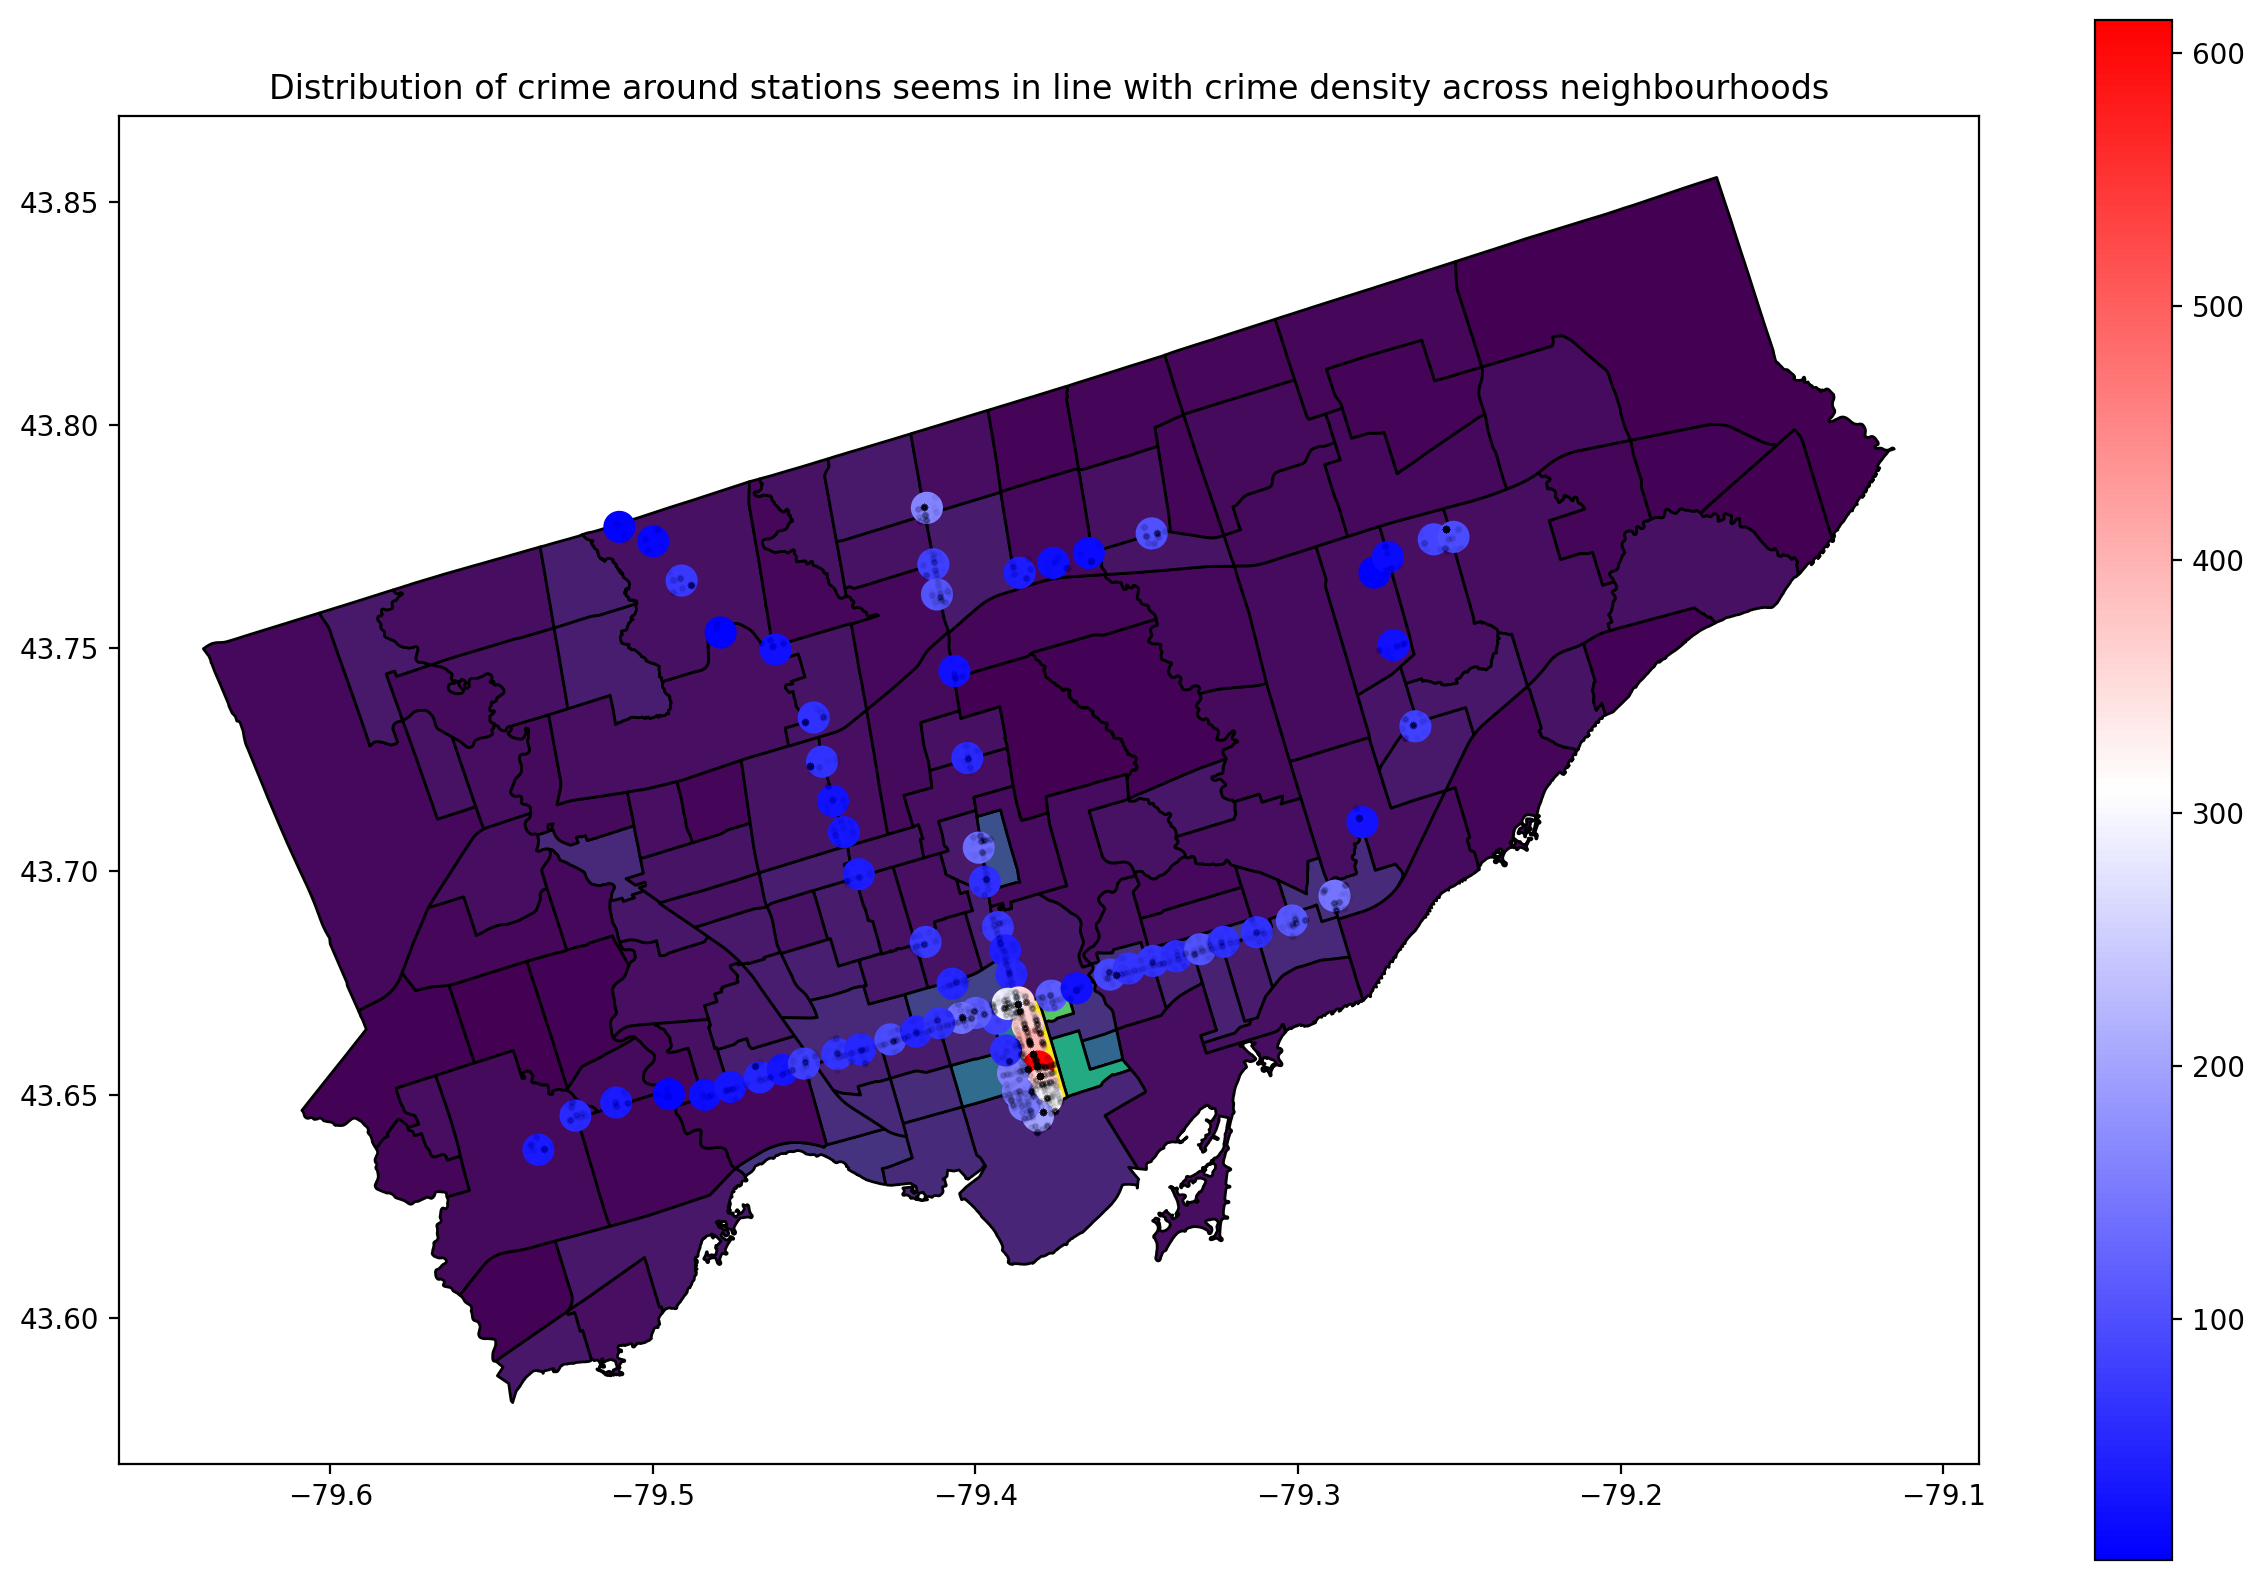

In [50]:
MCI_type = "MCI"
year = neighbourhoods_crime['occurrence_year'].max()
var = 'density'
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['occurrence_year'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   )
stations_area.merge(station_rank, on='station', how='left').plot(
    column = 'crime_count', 
    ax=ax, cmap = 'bwr', markersize = 3, legend = True)
crime_around_stations.plot(ax=ax, color = 'black', markersize = 3, alpha = 0.01)
ax.set_title("Distribution of crime around stations seems in line with crime density across neighbourhoods")